In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.integrate
import scipy.optimize
from pandas import *
# from jupyterthemes import jtplot
# import numba as nb
import matplotlib.pyplot as plt
import matplotlib as mtp

from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from scipy import signal
#%matplotlib notebook
plt.rcParams["font.size"]="16"
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.width'] = 2
plt.rcParams['figure.figsize'] = [6, 5]

In [9]:
pe_comp = np.loadtxt('2%_comp/pe_fit.txt')
s_comp = np.loadtxt('2%_comp/entropy_fit.txt')
r_comp = np.loadtxt('2%_comp/reac_coord_fit.txt')
pe_neb = np.loadtxt('2%_comp/pe_neb.txt')
s_neb = np.loadtxt('2%_comp/s_neb.txt')

T1 = T_nuc = 650 # nuc temperature
T2 = 300 
T3 = 100

pe_nuc = pe_comp[4+np.argmax((pe_comp-T_nuc*s_comp)[4:])]
s_nuc = s_comp[4+np.argmax((pe_comp-T_nuc*s_comp)[4:])]
r_nuc = r_comp[4+np.argmax((pe_comp-T_nuc*s_comp)[4:])]


In [10]:
 print (r' $\nu_{vtst}$ = ' + f'{120*np.exp(s_nuc/8.61e-5)*1e12}')

 $\nu_{vtst}$ = 1.7779400762107874e+34


(1000000000000.0, 1e+47)

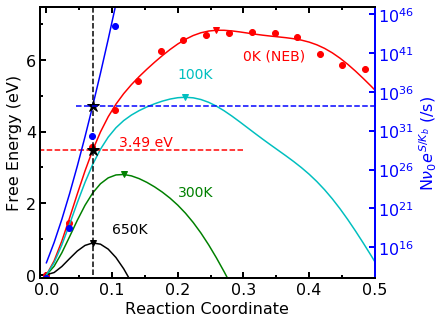

In [15]:
fig, ax1 = plt.subplots()
ax1.xaxis.set_major_locator(MultipleLocator(0.1))
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_major_locator(MultipleLocator(2.))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.tick_params(direction = 'in', length = 6, top = True, right = True, which = 'major')
plt.tick_params(direction = 'in', length = 3, top = True, right = True, which = 'minor')


ax1.plot(r_comp, pe_comp, 'r')
ax1.plot(pe_neb[:,0]-pe_neb[2,0], pe_neb[:,1], 'ro')

ax1.plot(r_comp, pe_comp - T_nuc*s_comp , 'k')
ax1.plot(r_comp, pe_comp - T2*s_comp , 'g')
ax1.plot(r_comp, pe_comp - T3*s_comp , 'c')
ax1.plot(r_comp[4+np.argmax((pe_comp)[4:])], max((pe_comp)[4:]), 'rv')
ax1.plot(r_comp[4+np.argmax((pe_comp - T_nuc*s_comp)[4:])], max((pe_comp - T_nuc*s_comp)[4:]), 'kv')
ax1.plot(r_comp[4+np.argmax((pe_comp - T2*s_comp)[4:])], max((pe_comp - T2*s_comp)[4:]), 'gv')
ax1.plot(r_comp[4+np.argmax((pe_comp - T3*s_comp)[4:])], max((pe_comp - T3*s_comp)[4:]), 'cv')

ax1.plot(r_comp[4+np.argmax((pe_comp-T1*s_comp)[4:])]*np.ones((10,)), np.linspace(0,7.5,10),'k--')
ax1.plot(np.linspace(-.1,.3,10), pe_comp[4+np.argmax((pe_comp-T1*s_comp)[4:])]*np.ones((10,)),'r--')
ax1.plot(r_nuc, pe_nuc, 'k*', markersize=12)
ax1.annotate('' + '{:.2f}'.format(pe_nuc)+' eV', (r_nuc+0.04,pe_nuc+.1), color='r', size=14)

ax1.annotate('' + '{:d}'.format(0)+'K (NEB)', (.3, 6), color='r', size=14)
ax1.annotate('' + '{:d}'.format(T3)+'K', (.2, 5.5), color='c', size=14)
ax1.annotate('' + '{:d}'.format(T2)+'K', (.2, 2.2), color='g', size=14)
ax1.annotate('' + '{:d}'.format(T_nuc)+'K', (.1, 1.15), color='k', size=14)

ax1.set_xlim(-0.01,0.5)
ax1.set_ylim(-.1,7.5)
ax1.set_ylabel('Free Energy (eV)')
ax1.set_xlabel('Reaction Coordinate')

ax2 = ax1.twinx()
ax2.semilogy(r_comp[:28], 120*np.exp(s_comp[:28]/8.617e-5)*1e12, 'b-')
ax2.semilogy(pe_neb[2:12,0]-pe_neb[2,0], np.exp(s_neb[2:12]/8.617e-5)*1e12, 'bo')

ax2.semilogy(r_nuc, 120*np.exp(s_nuc/8.617e-5)*1e12,'k*', markersize=12)
ax2.semilogy(np.linspace(.045,.5,10), 120*np.exp(s_nuc/8.617e-5)*1e12*np.ones((10,)),'b--')

# ax1.annotate('' + '{:.2E}'.format(120*np.exp(s_nuc/8.617e-5)*1e12)+' /s', (.35, pe_nuc+1.4), color='b', size='14')
ax2.tick_params(direction = 'in', length = 6, top = True, color = 'blue', labelcolor='blue', right = True, which = 'major')
ax2.tick_params(direction = 'in', length = 3, top = True, right = True, which = 'minor')
ax2.set_ylabel(r'N$\nu_0 e^{S/K_b}$ (/s)', color='b')
ax2.spines['right'].set_color('blue')
ax2.set_ylim(1e12,1e47)

# plt.savefig('free_energy_compression.png', bbox_inches='tight', dpi=600)

In [10]:
pe_comp = np.loadtxt('2%_tens/pe_fit.txt')
s_comp = np.loadtxt('2%_tens/entropy_fit.txt')
r_comp = np.loadtxt('2%_tens/reac_coord_fit.txt')
pe_neb = np.loadtxt('2%_tens/pe_neb.txt')
s_neb = np.loadtxt('2%_tens/s_neb.txt')

T_nuc = 100 # nuc temperature
T2 = 300 
T3 = 600

pe_nuc = pe_comp[4+np.argmax((pe_comp-T_nuc*s_comp)[4:])]
s_nuc = s_comp[4+np.argmax((pe_comp-T_nuc*s_comp)[4:])]
r_nuc = r_comp[4+np.argmax((pe_comp-T_nuc*s_comp)[4:])]

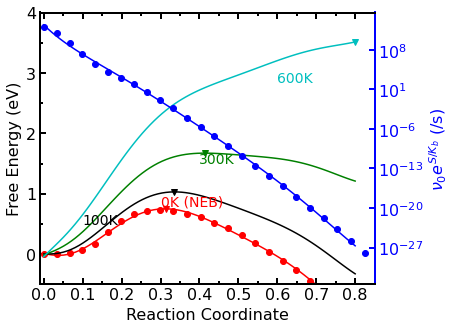

In [18]:
fig, ax1 = plt.subplots()
ax1.xaxis.set_major_locator(MultipleLocator(0.1))
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_major_locator(MultipleLocator(1.))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.tick_params(direction = 'in', length = 6, top = True, right = True, which = 'major')
plt.tick_params(direction = 'in', length = 3, top = True, right = True, which = 'minor')


ax1.plot(r_comp, pe_comp, 'r')
ax1.plot(pe_neb[:,0], pe_neb[:,1], 'ro')

ax1.plot(r_comp, pe_comp - T_nuc*s_comp , 'k')
ax1.plot(r_comp, pe_comp - T2*s_comp , 'g')
ax1.plot(r_comp, pe_comp - T3*s_comp , 'c')
ax1.plot(r_comp[4+np.argmax((pe_comp)[4:])], max((pe_comp)[4:]), 'rv')
ax1.plot(r_comp[4+np.argmax((pe_comp - T_nuc*s_comp)[4:])], max((pe_comp - T_nuc*s_comp)[4:]), 'kv')
ax1.plot(r_comp[4+np.argmax((pe_comp - T2*s_comp)[4:])], max((pe_comp - T2*s_comp)[4:]), 'gv')
ax1.plot(r_comp[4+np.argmax((pe_comp - T3*s_comp)[4:])], max((pe_comp - T3*s_comp)[4:]), 'cv')

# ax1.plot(r_comp[4+np.argmax((pe_comp-T1*s_comp)[4:])]*np.ones((10,)), np.linspace(0,7.5,10),'k--')
# ax1.plot(np.linspace(-.1,.3,10), pe_comp[4+np.argmax((pe_comp-T1*s_comp)[4:])]*np.ones((10,)),'r--')
# ax1.plot(r_nuc, pe_nuc, 'k*', markersize=12)
# ax1.annotate('' + '{:.2f}'.format(pe_nuc)+' eV', (r_nuc+0.04,pe_nuc+.1), color='r', size=14)

ax1.annotate('' + '{:d}'.format(0)+'K (NEB)', (.3, .8), color='r', size=14)
ax1.annotate('' + '{:d}'.format(T3)+'K', (.6, 2.85), color='c', size=14)
ax1.annotate('' + '{:d}'.format(T2)+'K', (.4, 1.5), color='g', size=14)
ax1.annotate('' + '{:d}'.format(T_nuc)+'K', (.1, .5), color='k', size=14)

ax1.set_xlim(-0.01,0.85)
ax1.set_ylim(-.5, 4)
ax1.set_ylabel('Free Energy (eV)')
ax1.set_xlabel('Reaction Coordinate')

ax2 = ax1.twinx()
ax2.semilogy(r_comp, np.exp(s_comp/8.617e-5)*1e12, 'b-')
ax2.semilogy(pe_neb[:,0], np.exp(s_neb/8.617e-5)*1e12, 'bo')

# ax2.semilogy(r_nuc, np.exp(s_nuc/8.617e-5)*1e12,'k*', markersize=12)
# ax2.semilogy(np.linspace(.045,.5,10), np.exp(s_nuc/8.617e-5)*1e12*np.ones((10,)),'b--')
# ax1.annotate('' + '{:.2E}'.format(np.exp(s_nuc/8.617e-5)*1e12)+' /s', (.35, pe_nuc+1.2), color='b', size='14')
ax2.tick_params(direction = 'in', length = 6, top = True, color = 'blue', labelcolor='blue', right = True, which = 'major')
ax2.tick_params(direction = 'in', length = 3, top = True, right = True, which = 'minor')
ax2.set_ylabel(r'$\nu_0 e^{S/K_b}$ (/s)', color='b')
ax2.spines['right'].set_color('blue')

plt.savefig('free_energy_tension.png', bbox_inches='tight', dpi=600)

In [15]:
(178.569 - 171.701)/171.701

0.039999767036883856